In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [2]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [3]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'softmax', units=11)) 

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:



train_set = train_datagen.flow_from_directory(
        r'D:/Shweta_workspace/Term-3/AI/dataset/casestudy-Widgets/UI-Widget-case study/training_set',
        target_size=(150, 150),
        class_mode='categorical')

Found 7040 images belonging to 11 classes.


In [7]:
test_set = test_datagen.flow_from_directory(
        r'D:/Shweta_workspace/Term-3/AI/dataset/casestudy-Widgets/UI-Widget-case study/test_set',
        target_size=(150, 150),
        class_mode='categorical')

Found 560 images belonging to 11 classes.


In [8]:
model.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set)


Epoch 1/5
220/220 [==============================] - 422s 2s/step - loss: 0.1936 - acc: 0.9449 - val_loss: 0.0287 - val_acc: 0.9946
Epoch 2/5
220/220 [==============================] - 410s 2s/step - loss: 0.0178 - acc: 0.9949 - val_loss: 0.0076 - val_acc: 0.9982
Epoch 3/5
220/220 [==============================] - 462s 2s/step - loss: 0.0191 - acc: 0.9957 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 4/5
220/220 [==============================] - 641s 3s/step - loss: 0.0084 - acc: 0.9982 - val_loss: 0.0161 - val_acc: 0.9929
Epoch 5/5
220/220 [==============================] - 662s 3s/step - loss: 0.0612 - acc: 0.9903 - val_loss: 0.0311 - val_acc: 0.9911


In [9]:
train_set.class_indices

{'cards': 0,
 'checkbox': 1,
 'combobox': 2,
 'enable_disable': 3,
 'forward': 4,
 'home': 5,
 'information_icon': 6,
 'tabview': 7,
 'textbox': 8,
 'window_header': 9,
 'zoom': 10}

In [20]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img(r'D:/Shweta_workspace/Term-3/AI/dataset/casestudy-Widgets/UI-Widget-case study/fwd1.png'
                           ,target_size =(150,150))

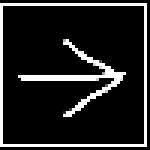

In [23]:
test_image

In [24]:
## Convert image to array
test_image = image.img_to_array(test_image)

test_image=test_image.reshape(1,150, 150, 3)

In [25]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [26]:
np.around(result)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
result=result.argmax()

result

4

In [28]:
label_map = (train_set.class_indices)
print(label_map)

{'cards': 0, 'checkbox': 1, 'combobox': 2, 'enable_disable': 3, 'forward': 4, 'home': 5, 'information_icon': 6, 'tabview': 7, 'textbox': 8, 'window_header': 9, 'zoom': 10}


In [29]:
## Class label 

if result == 0:
    prediction = 'cards'
elif result == 1:
    prediction = 'checkbox'
elif result == 2:
    prediction = 'combobox'
elif result == 3:
    prediction = 'enable_disable'
elif result == 4:
    prediction = 'forward'
elif result == 5:
    prediction = 'home'
elif result == 6:
    prediction = 'information_icon'
elif result == 7:
    prediction = 'tabview'
elif result == 8:
    prediction = 'textbox'
elif result == 9:
    prediction = 'window_header'
else:
    prediction = 'bike'
    

In [30]:
prediction

'forward'